<a href="https://colab.research.google.com/github/UKD1211/FDM_based_Node_Potential_Calculation_for_Capacitor_Plates/blob/main/FDM_based_Node_Potential_Calculation_for_Capacitor_Plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the top boundary voltage (e.g., 500V): 500 
Enter the number of grid points per side, including boundary (e.g., 5): 4
Converged after 30 iterations.

Final node voltages:
[[500.         500.         500.         500.         500.        ]
 [375.         374.99999966 374.99999966 374.99999983 375.        ]
 [250.         249.99999966 249.99999966 249.99999983 250.        ]
 [125.         124.99999983 124.99999983 124.99999991 125.        ]
 [  0.           0.           0.           0.           0.        ]]


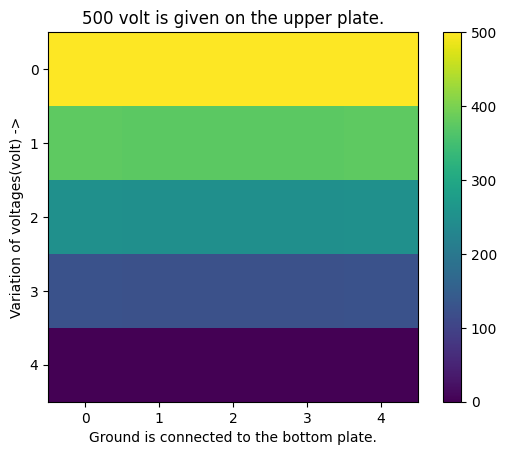

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_inner_node_voltages(N, top_voltage):
    """
    Calculate the voltages at the inner nodes based on boundary conditions.
    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
        spacing: Distance between grid points.
    Returns:
        voltages: List of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N-1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1,N-1)]
    boundary_right = [top_voltage - i * E for i in range(1,N-1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node
        for i in range(1, N-1):
            for j in range(1, N-1):
                voltages[i, j] = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])

        # Check for convergence

        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = (int(input("Enter the number of grid points per side, including boundary (e.g., 5): "))+1)   # Number of grid points
#spacing = float(input(f"Enter the spacing between points (d), ensure d/N is a natural number: "))  # Grid spacing

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# Plot the node voltages

plt.imshow(voltages, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Adds a colorbar to the side.
plt.title(f"{int(top_voltage)} volt is given on the upper plate.")
plt.ylabel("Variation of voltages(volt) ->")
plt.xlabel("Ground is connected to the bottom plate.")
plt.show()


Enter the top boundary voltage (e.g., 500V): 500
Enter the number of grid points per side, including boundary (e.g., 5): 5
Converged after 48 iterations.

Final node voltages:
[[500.         500.         500.         500.         500.
  500.        ]
 [400.         399.99999966 399.99999955 399.99999964 399.99999982
  400.        ]
 [300.         299.99999955 299.99999941 299.99999952 299.99999976
  300.        ]
 [200.         199.99999964 199.99999952 199.99999961 199.99999981
  200.        ]
 [100.          99.99999982  99.99999976  99.99999981  99.9999999
  100.        ]
 [  0.           0.           0.           0.           0.
    0.        ]]


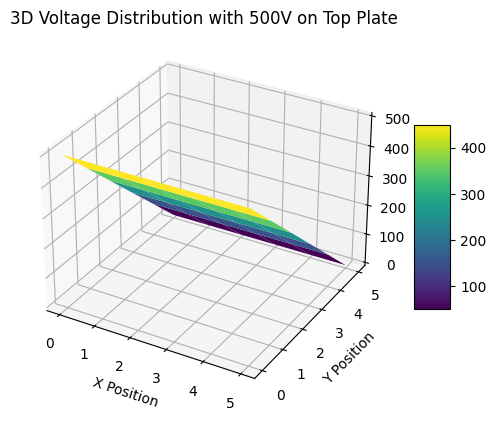

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

def calculate_inner_node_voltages(N, top_voltage):
    """
    Calculate the voltages at the inner nodes based on boundary conditions.
    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
    Returns:
        voltages: List of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N-1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1,N-1)]
    boundary_right = [top_voltage - i * E for i in range(1,N-1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node
        for i in range(1, N-1):
            for j in range(1, N-1):
                voltages[i, j] = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = (int(input("Enter the number of grid points per side, including boundary (e.g., 5): "))+1)   # Number of grid points

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Surface Plot
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, voltages, cmap='viridis')

# Labels and title
ax.set_title(f"3D Voltage Distribution with {int(top_voltage)}V on Top Plate")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 800
Enter the number of grid points per side, including boundary (e.g., 5): 6
Converged after 71 iterations.

Final node voltages:
[[800.         800.         800.         800.         800.
  800.         800.        ]
 [666.66666667 666.66666632 666.66666615 666.66666615 666.66666628
  666.66666647 666.66666667]
 [533.33333333 533.33333281 533.33333255 533.33333255 533.33333275
  533.33333304 533.33333333]
 [400.         399.99999948 399.99999922 399.99999922 399.99999942
  399.99999971 400.        ]
 [266.66666667 266.66666628 266.66666608 266.66666608 266.66666623
  266.66666645 266.66666667]
 [133.33333333 133.33333314 133.33333304 133.33333304 133.33333311
  133.33333322 133.33333333]
 [  0.           0.           0.           0.           0.
    0.           0.        ]]


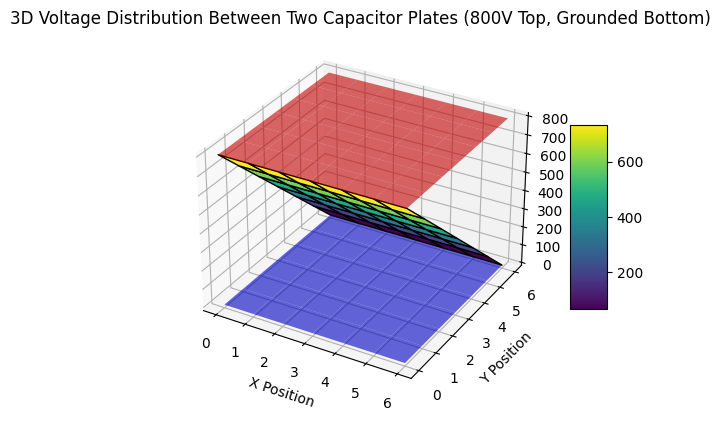

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage):
    """
    Calculate the voltages at the inner nodes based on boundary conditions.
    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
    Returns:
        voltages: List of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N-1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1,N-1)]
    boundary_right = [top_voltage - i * E for i in range(1,N-1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node
        for i in range(1, N-1):
            for j in range(1, N-1):
                voltages[i, j] = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = (int(input("Enter the number of grid points per side, including boundary (e.g., 5): "))+1)   # Number of grid points

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 600
Enter the number of grid points per side, including boundary (e.g., 5): 7
Converged after 95 iterations.

Final node voltages:
[[600.         600.         600.         600.         600.
  600.         600.         600.        ]
 [514.28571429 514.28571394 514.28571373 514.28571366 514.28571372
  514.28571388 514.28571408 514.28571429]
 [428.57142857 428.57142802 428.57142767 428.57142756 428.57142766
  428.57142791 428.57142824 428.57142857]
 [342.85714286 342.85714223 342.85714184 342.85714172 342.85714183
  342.85714212 342.85714249 342.85714286]
 [257.14285714 257.14285658 257.14285623 257.14285612 257.14285622
  257.14285647 257.14285681 257.14285714]
 [171.42857143 171.42857102 171.42857077 171.42857069 171.42857076
  171.42857095 171.42857119 171.42857143]
 [ 85.71428571  85.71428551  85.71428538  85.71428534  85.71428538
   85.71428547  85.71428559  85.71428571]
 [  0.           0.           0.           0.           0.
    0.    

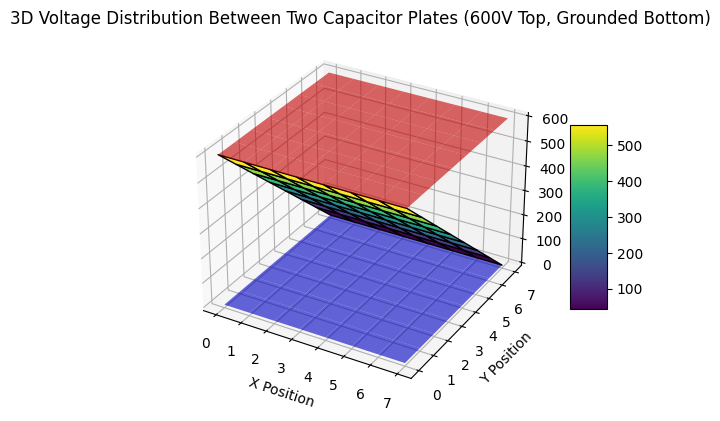

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage):
    """
    Calculate the voltages at the inner nodes based on boundary conditions.
    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
    Returns:
        voltages: List of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N-1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1,N-1)]
    boundary_right = [top_voltage - i * E for i in range(1,N-1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node
        for i in range(1, N-1):
            for j in range(1, N-1):
                voltages[i, j] = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = (int(input("Enter the number of grid points per side, including boundary (e.g., 5): "))+1)   # Number of grid points

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 200
Enter the number of grid points per side, including boundary (e.g., 5): 9
Converged after 148 iterations.

Final node voltages:
[[200.         200.         200.         200.         200.
  200.         200.         200.         200.         200.        ]
 [177.77777778 177.77777751 177.77777731 177.77777718 177.77777714
  177.77777718 177.77777728 177.77777743 177.7777776  177.77777778]
 [155.55555556 155.55555508 155.55555472 155.5555545  155.55555443
  155.5555545  155.55555468 155.55555494 155.55555525 155.55555556]
 [133.33333333 133.33333274 133.33333228 133.333332   133.33333191
  133.33333199 133.33333222 133.33333256 133.33333295 133.33333333]
 [111.11111111 111.11111047 111.11110998 111.11110968 111.11110959
  111.11110968 111.11110993 111.11111029 111.1111107  111.11111111]
 [ 88.88888889  88.88888829  88.88888783  88.88888755  88.88888746
   88.88888754  88.88888778  88.88888811  88.8888885   88.88888889]
 [ 66.66666667  66.66

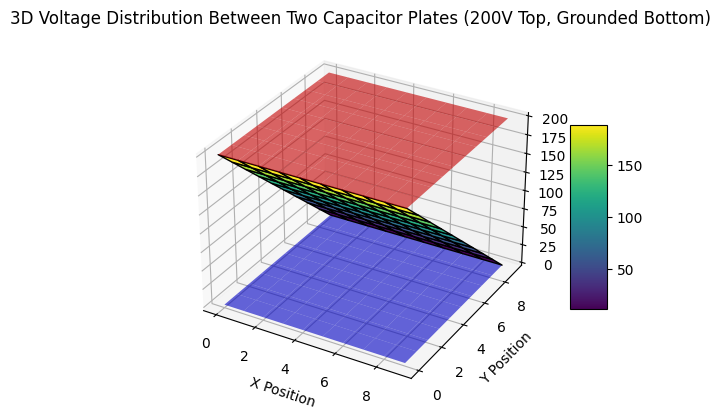

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage):
    """
    Calculate the voltages at the inner nodes based on boundary conditions.
    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
    Returns:
        voltages: List of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N-1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1,N-1)]
    boundary_right = [top_voltage - i * E for i in range(1,N-1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node
        for i in range(1, N-1):
            for j in range(1, N-1):
                voltages[i, j] = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = (int(input("Enter the number of grid points per side, including boundary (e.g., 5): "))+1)   # Number of grid points

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

Enter the top boundary voltage (e.g., 500V): 500
Enter the number of grid points per side, including boundary (e.g., 5): 5
Enter the relaxation factor (e.g., 1.5): 1.5
Converged after 31 iterations with relaxation factor 1.5.

Final node voltages:
[[500.         500.         500.         500.         500.
  500.        ]
 [400.         399.99999966 399.9999999  399.99999985 399.99999998
  400.        ]
 [300.         299.99999979 299.99999997 299.99999996 300.00000006
  300.        ]
 [200.         200.00000003 200.00000003 200.         200.00000002
  200.        ]
 [100.          99.99999996 100.00000004 100.         100.00000005
  100.        ]
 [  0.           0.           0.           0.           0.
    0.        ]]


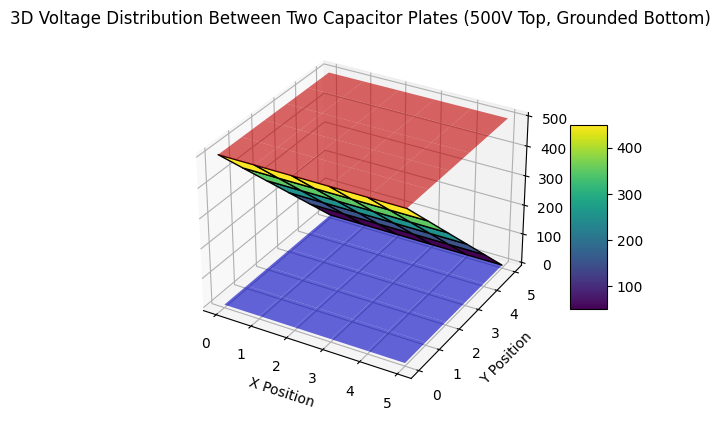

In [1]:
# WITH THE Successive Over-Relaxation (SOR).

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage, omega=1.5):
    """
    Calculate the voltages at the inner nodes using SOR for faster convergence.

    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
        omega: Relaxation factor (default is 1.5 for over-relaxation).

    Returns:
        voltages: Array of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N - 1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1, N - 1)]
    boundary_right = [top_voltage - i * E for i in range(1, N - 1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration with relaxation (SOR) to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node using the SOR formula
        for i in range(1, N-1):
            for j in range(1, N-1):
                new_value = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])
                voltages[i, j] = (1 - omega) * old_voltages[i, j] + omega * new_value

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations with relaxation factor {omega}.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = int(input("Enter the number of grid points per side, including boundary (e.g., 5): ")) + 1  # Number of grid points
omega = float(input("Enter the relaxation factor (e.g., 1.5): "))  # Relaxation factor

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage, omega)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 500
Enter the number of grid points per side, including boundary (e.g., 5): 5
Converged after 48 iterations.

Final node voltages:
[[500.         500.         500.         500.         500.
  500.        ]
 [400.         399.99999966 399.99999955 399.99999964 399.99999982
  400.        ]
 [300.         299.99999955 299.99999941 299.99999952 299.99999976
  300.        ]
 [200.         199.99999964 199.99999952 199.99999961 199.99999981
  200.        ]
 [100.          99.99999982  99.99999976  99.99999981  99.9999999
  100.        ]
 [  0.           0.           0.           0.           0.
    0.        ]]


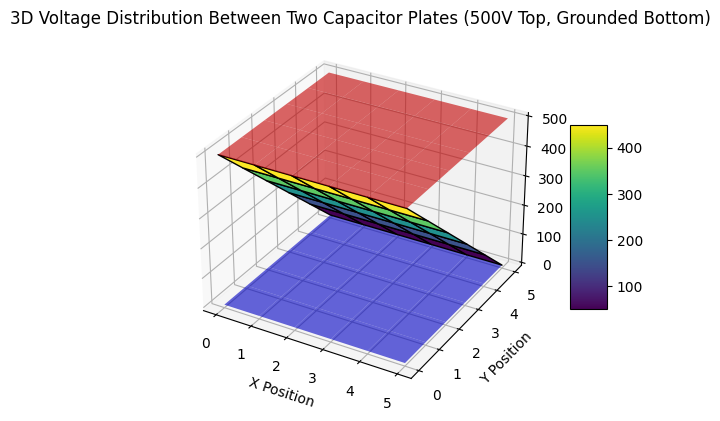

In [2]:
# Without Factor

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage):
    """
    Calculate the voltages at the inner nodes based on boundary conditions.
    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
    Returns:
        voltages: List of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N-1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1,N-1)]
    boundary_right = [top_voltage - i * E for i in range(1,N-1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node
        for i in range(1, N-1):
            for j in range(1, N-1):
                voltages[i, j] = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = (int(input("Enter the number of grid points per side, including boundary (e.g., 5): "))+1)   # Number of grid points

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

Enter the top boundary voltage (e.g., 500V): 600
Enter the number of grid points per side, including boundary (e.g., 5): 7
Enter the relaxation factor (e.g., 1.5): 1.9
Converged after 202 iterations with relaxation factor 1.9.

Final node voltages:
[[600.         600.         600.         600.         600.
  600.         600.         600.        ]
 [514.28571429 514.28571439 514.28571424 514.2857143  514.28571435
  514.28571429 514.28571429 514.28571429]
 [428.57142857 428.57142858 428.57142853 428.57142862 428.57142854
  428.57142857 428.57142839 428.57142857]
 [342.85714286 342.85714294 342.85714293 342.85714289 342.85714287
  342.85714277 342.85714279 342.85714286]
 [257.14285714 257.14285731 257.14285722 257.14285721 257.14285696
  257.14285715 257.14285708 257.14285714]
 [171.42857143 171.42857153 171.42857152 171.42857127 171.42857133
  171.42857148 171.42857137 171.42857143]
 [ 85.71428571  85.7142859   85.71428567  85.71428564  85.71428571
   85.71428575  85.71428566  85.714285

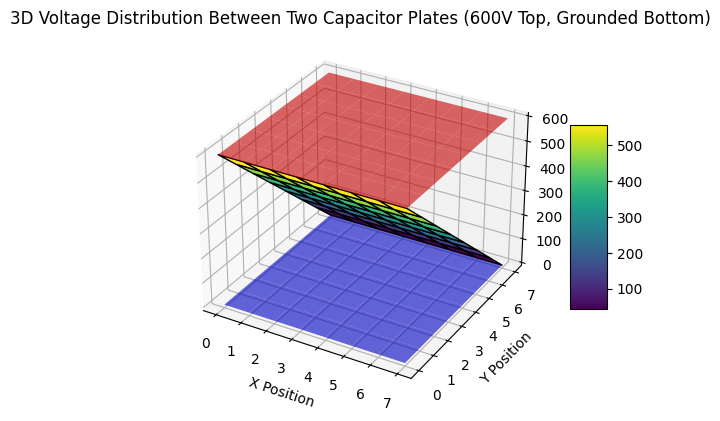

In [3]:
# WITH THE Successive Over-Relaxation (SOR).

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage, omega=1.5):
    """
    Calculate the voltages at the inner nodes using SOR for faster convergence.

    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
        omega: Relaxation factor (default is 1.5 for over-relaxation).

    Returns:
        voltages: Array of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N - 1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1, N - 1)]
    boundary_right = [top_voltage - i * E for i in range(1, N - 1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration with relaxation (SOR) to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node using the SOR formula
        for i in range(1, N-1):
            for j in range(1, N-1):
                new_value = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])
                voltages[i, j] = (1 - omega) * old_voltages[i, j] + omega * new_value

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations with relaxation factor {omega}.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = int(input("Enter the number of grid points per side, including boundary (e.g., 5): ")) + 1  # Number of grid points
omega = float(input("Enter the relaxation factor (e.g., 1.5): "))  # Relaxation factor

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage, omega)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 600
Enter the number of grid points per side, including boundary (e.g., 5): 7
Converged after 95 iterations.

Final node voltages:
[[600.         600.         600.         600.         600.
  600.         600.         600.        ]
 [514.28571429 514.28571394 514.28571373 514.28571366 514.28571372
  514.28571388 514.28571408 514.28571429]
 [428.57142857 428.57142802 428.57142767 428.57142756 428.57142766
  428.57142791 428.57142824 428.57142857]
 [342.85714286 342.85714223 342.85714184 342.85714172 342.85714183
  342.85714212 342.85714249 342.85714286]
 [257.14285714 257.14285658 257.14285623 257.14285612 257.14285622
  257.14285647 257.14285681 257.14285714]
 [171.42857143 171.42857102 171.42857077 171.42857069 171.42857076
  171.42857095 171.42857119 171.42857143]
 [ 85.71428571  85.71428551  85.71428538  85.71428534  85.71428538
   85.71428547  85.71428559  85.71428571]
 [  0.           0.           0.           0.           0.
    0.    

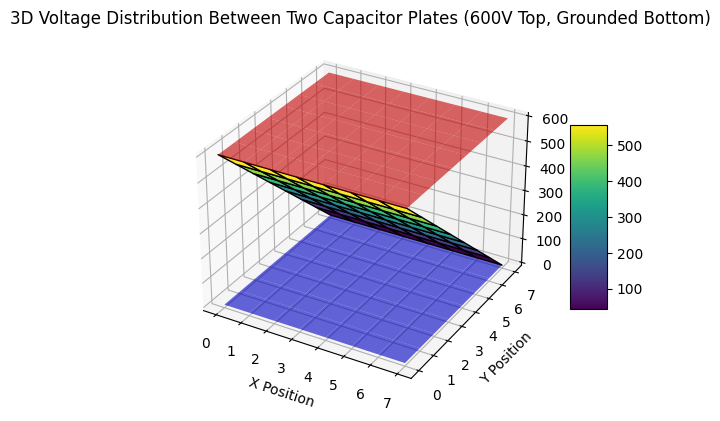

In [4]:
# Without Factor

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage):
    """
    Calculate the voltages at the inner nodes based on boundary conditions.
    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
    Returns:
        voltages: List of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N-1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1,N-1)]
    boundary_right = [top_voltage - i * E for i in range(1,N-1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node
        for i in range(1, N-1):
            for j in range(1, N-1):
                voltages[i, j] = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = (int(input("Enter the number of grid points per side, including boundary (e.g., 5): "))+1)   # Number of grid points

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 600
Enter the number of grid points per side, including boundary (e.g., 5): 7
Enter the relaxation factor (e.g., 1.5): 1.1
Converged after 77 iterations with relaxation factor 1.1.

Final node voltages:
[[600.         600.         600.         600.         600.
  600.         600.         600.        ]
 [514.28571429 514.28571402 514.28571386 514.28571382 514.28571388
  514.285714   514.28571415 514.28571429]
 [428.57142857 428.57142815 428.5714279  428.57142784 428.57142793
  428.57142812 428.57142835 428.57142857]
 [342.85714286 342.85714239 342.85714213 342.85714206 342.85714216
  342.85714236 342.85714262 342.85714286]
 [257.14285714 257.14285674 257.1428565  257.14285644 257.14285653
  257.14285671 257.14285693 257.14285714]
 [171.42857143 171.42857114 171.42857098 171.42857094 171.428571
  171.42857112 171.42857128 171.42857143]
 [ 85.71428571  85.71428558  85.71428549  85.71428547  85.7142855
   85.71428557  85.71428564  85.71428571]


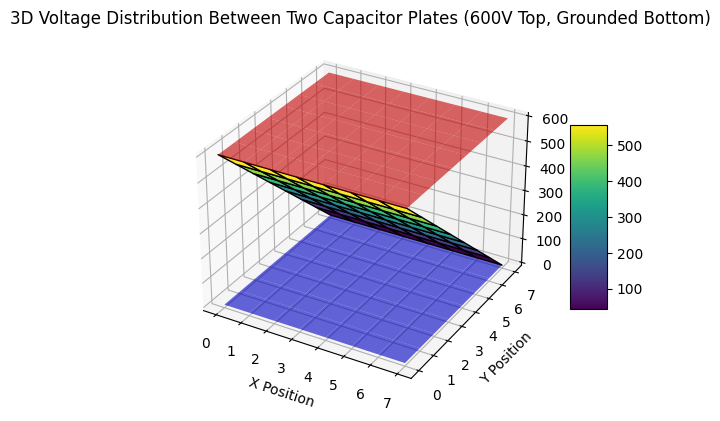

In [5]:
# WITH THE Successive Over-Relaxation (SOR).

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage, omega=1.5):
    """
    Calculate the voltages at the inner nodes using SOR for faster convergence.

    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
        omega: Relaxation factor (default is 1.5 for over-relaxation).

    Returns:
        voltages: Array of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N - 1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1, N - 1)]
    boundary_right = [top_voltage - i * E for i in range(1, N - 1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration with relaxation (SOR) to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node using the SOR formula
        for i in range(1, N-1):
            for j in range(1, N-1):
                new_value = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])
                voltages[i, j] = (1 - omega) * old_voltages[i, j] + omega * new_value

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations with relaxation factor {omega}.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = int(input("Enter the number of grid points per side, including boundary (e.g., 5): ")) + 1  # Number of grid points
omega = float(input("Enter the relaxation factor (e.g., 1.5): "))  # Relaxation factor

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage, omega)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 600
Enter the number of grid points per side, including boundary (e.g., 5): 7
Enter the relaxation factor (e.g., 1.5): 1.3
Converged after 46 iterations with relaxation factor 1.3.

Final node voltages:
[[600.         600.         600.         600.         600.
  600.         600.         600.        ]
 [514.28571429 514.28571412 514.28571405 514.28571405 514.2857141
  514.28571417 514.28571423 514.28571429]
 [428.57142857 428.57142833 428.57142823 428.57142824 428.57142831
  428.5714284  428.5714285  428.57142857]
 [342.85714286 342.85714262 342.85714252 342.85714253 342.85714259
  342.85714269 342.85714278 342.85714286]
 [257.14285714 257.14285696 257.14285688 257.14285688 257.14285693
  257.14285701 257.14285708 257.14285714]
 [171.42857143 171.42857131 171.42857126 171.42857126 171.4285713
  171.42857134 171.42857139 171.42857143]
 [ 85.71428571  85.71428566  85.71428564  85.71428564  85.71428566
   85.71428568  85.7142857   85.71428571]

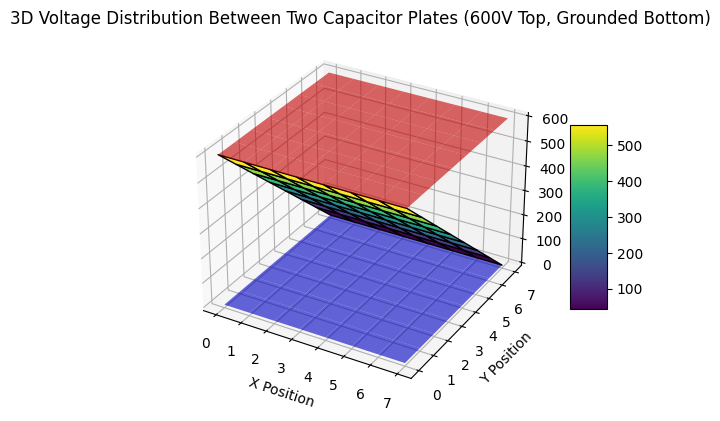

In [6]:
# WITH THE Successive Over-Relaxation (SOR).

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage, omega=1.5):
    """
    Calculate the voltages at the inner nodes using SOR for faster convergence.

    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
        omega: Relaxation factor (default is 1.5 for over-relaxation).

    Returns:
        voltages: Array of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N - 1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1, N - 1)]
    boundary_right = [top_voltage - i * E for i in range(1, N - 1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration with relaxation (SOR) to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node using the SOR formula
        for i in range(1, N-1):
            for j in range(1, N-1):
                new_value = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])
                voltages[i, j] = (1 - omega) * old_voltages[i, j] + omega * new_value

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations with relaxation factor {omega}.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = int(input("Enter the number of grid points per side, including boundary (e.g., 5): ")) + 1  # Number of grid points
omega = float(input("Enter the relaxation factor (e.g., 1.5): "))  # Relaxation factor

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage, omega)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 600
Enter the number of grid points per side, including boundary (e.g., 5): 6
Converged after 70 iterations.

Final node voltages:
[[600.         600.         600.         600.         600.
  600.         600.        ]
 [500.         499.99999965 499.99999948 499.99999948 499.99999961
  499.99999981 500.        ]
 [400.         399.99999948 399.99999922 399.99999922 399.99999942
  399.99999971 400.        ]
 [300.         299.99999948 299.99999922 299.99999922 299.99999942
  299.99999971 300.        ]
 [200.         199.99999961 199.99999942 199.99999942 199.99999956
  199.99999978 200.        ]
 [100.          99.99999981  99.99999971  99.99999971  99.99999978
   99.99999989 100.        ]
 [  0.           0.           0.           0.           0.
    0.           0.        ]]


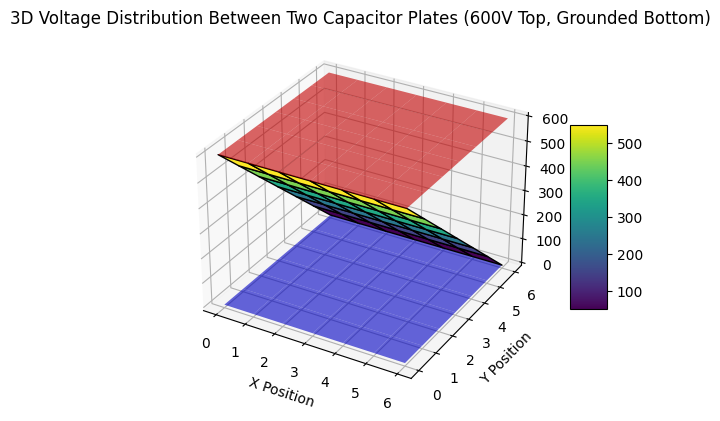

In [7]:
# Without Factor

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage):
    """
    Calculate the voltages at the inner nodes based on boundary conditions.
    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
    Returns:
        voltages: List of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N-1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1,N-1)]
    boundary_right = [top_voltage - i * E for i in range(1,N-1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node
        for i in range(1, N-1):
            for j in range(1, N-1):
                voltages[i, j] = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = (int(input("Enter the number of grid points per side, including boundary (e.g., 5): "))+1)   # Number of grid points

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 600
Enter the number of grid points per side, including boundary (e.g., 5): 6
Enter the relaxation factor (e.g., 1.5): 1.2
Converged after 43 iterations with relaxation factor 1.2.

Final node voltages:
[[600.         600.         600.         600.         600.
  600.         600.        ]
 [500.         499.99999974 499.99999964 499.99999968 499.99999978
  499.9999999  500.        ]
 [400.         399.99999964 399.99999951 399.99999956 399.9999997
  399.99999986 400.        ]
 [300.         299.99999968 299.99999956 299.9999996  299.99999973
  299.99999988 300.        ]
 [200.         199.99999978 199.9999997  199.99999973 199.99999982
  199.99999992 200.        ]
 [100.          99.9999999   99.99999986  99.99999988  99.99999992
   99.99999996 100.        ]
 [  0.           0.           0.           0.           0.
    0.           0.        ]]


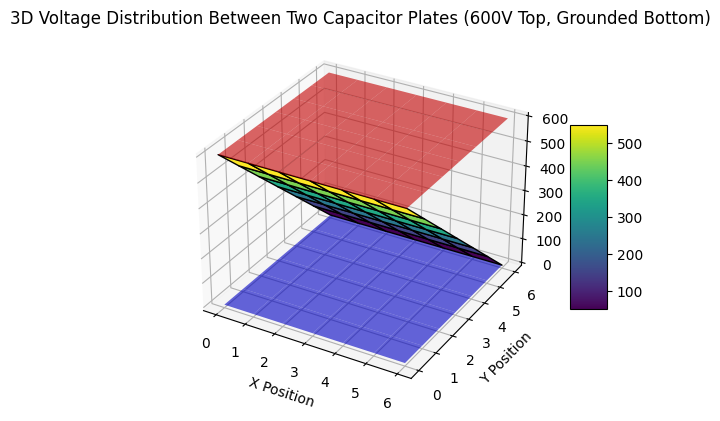

In [8]:
# WITH THE Successive Over-Relaxation (SOR).

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage, omega=1.5):
    """
    Calculate the voltages at the inner nodes using SOR for faster convergence.

    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
        omega: Relaxation factor (default is 1.5 for over-relaxation).

    Returns:
        voltages: Array of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N - 1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1, N - 1)]
    boundary_right = [top_voltage - i * E for i in range(1, N - 1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration with relaxation (SOR) to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node using the SOR formula
        for i in range(1, N-1):
            for j in range(1, N-1):
                new_value = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])
                voltages[i, j] = (1 - omega) * old_voltages[i, j] + omega * new_value

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations with relaxation factor {omega}.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = int(input("Enter the number of grid points per side, including boundary (e.g., 5): ")) + 1  # Number of grid points
omega = float(input("Enter the relaxation factor (e.g., 1.5): "))  # Relaxation factor

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage, omega)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 600
Enter the number of grid points per side, including boundary (e.g., 5): 6
Enter the relaxation factor (e.g., 1.5): 1.6
Converged after 42 iterations with relaxation factor 1.6.

Final node voltages:
[[600.         600.         600.         600.         600.
  600.         600.        ]
 [500.         500.00000017 500.00000006 500.00000001 500.00000009
  500.00000004 500.        ]
 [400.         400.00000002 399.99999989 399.99999993 400.
  400.00000003 400.        ]
 [300.         299.99999986 299.99999993 299.99999988 300.00000005
  300.00000004 300.        ]
 [200.         200.0000001  199.9999999  200.         200.00000009
  200.00000004 200.        ]
 [100.          99.99999984  99.99999996 100.00000001 100.00000006
  100.         100.        ]
 [  0.           0.           0.           0.           0.
    0.           0.        ]]


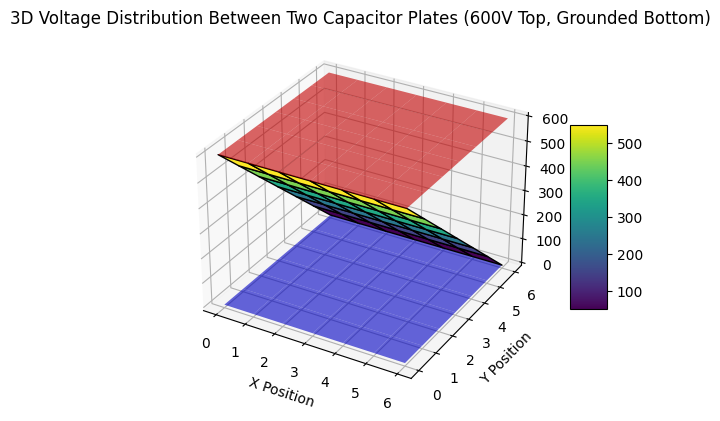

In [9]:
# WITH THE Successive Over-Relaxation (SOR).

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage, omega=1.5):
    """
    Calculate the voltages at the inner nodes using SOR for faster convergence.

    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
        omega: Relaxation factor (default is 1.5 for over-relaxation).

    Returns:
        voltages: Array of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N - 1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1, N - 1)]
    boundary_right = [top_voltage - i * E for i in range(1, N - 1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration with relaxation (SOR) to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node using the SOR formula
        for i in range(1, N-1):
            for j in range(1, N-1):
                new_value = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])
                voltages[i, j] = (1 - omega) * old_voltages[i, j] + omega * new_value

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations with relaxation factor {omega}.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = int(input("Enter the number of grid points per side, including boundary (e.g., 5): ")) + 1  # Number of grid points
omega = float(input("Enter the relaxation factor (e.g., 1.5): "))  # Relaxation factor

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage, omega)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 600
Enter the number of grid points per side, including boundary (e.g., 5): 6
Enter the relaxation factor (e.g., 1.5): 1.8
Converged after 95 iterations with relaxation factor 1.8.

Final node voltages:
[[600.         600.         600.         600.         600.
  600.         600.        ]
 [500.         500.00000024 500.00000026 500.00000022 500.0000002
  500.00000018 500.        ]
 [400.         400.0000001  400.00000018 400.00000008 400.00000025
  400.00000004 400.        ]
 [300.         300.00000025 300.00000014 300.00000019 300.00000018
  300.         300.        ]
 [200.         200.         200.00000011 200.00000008 200.00000014
  200.00000001 200.        ]
 [100.         100.00000016 100.00000003 100.00000006 100.00000008
   99.99999994 100.        ]
 [  0.           0.           0.           0.           0.
    0.           0.        ]]


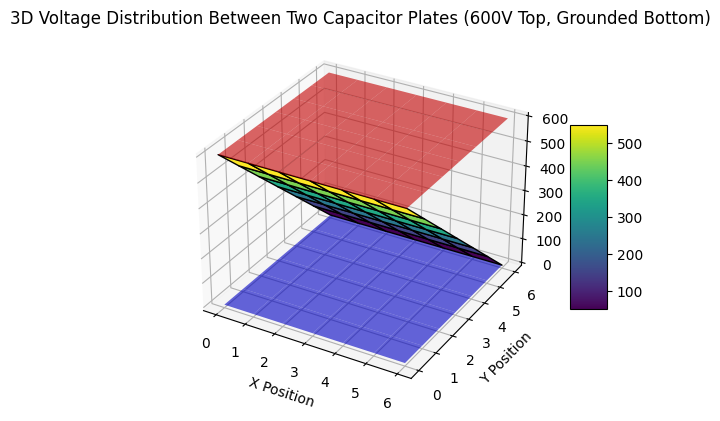

In [10]:
# WITH THE Successive Over-Relaxation (SOR).

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage, omega=1.5):
    """
    Calculate the voltages at the inner nodes using SOR for faster convergence.

    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
        omega: Relaxation factor (default is 1.5 for over-relaxation).

    Returns:
        voltages: Array of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N - 1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1, N - 1)]
    boundary_right = [top_voltage - i * E for i in range(1, N - 1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration with relaxation (SOR) to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node using the SOR formula
        for i in range(1, N-1):
            for j in range(1, N-1):
                new_value = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])
                voltages[i, j] = (1 - omega) * old_voltages[i, j] + omega * new_value

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations with relaxation factor {omega}.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = int(input("Enter the number of grid points per side, including boundary (e.g., 5): ")) + 1  # Number of grid points
omega = float(input("Enter the relaxation factor (e.g., 1.5): "))  # Relaxation factor

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage, omega)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with the Grid in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
surf = ax.plot_surface(X, Y, voltages, cmap='viridis', edgecolor='k')

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"3D Voltage Distribution Between Two Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Color bar for the voltage distribution
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 500
Enter the number of grid points per side, including boundary (e.g., 5): 5
Enter the relaxation factor (e.g., 1.5): 1.5
Converged after 31 iterations with relaxation factor 1.5.

Final node voltages:
[[500.         500.         500.         500.         500.
  500.        ]
 [400.         399.99999966 399.9999999  399.99999985 399.99999998
  400.        ]
 [300.         299.99999979 299.99999997 299.99999996 300.00000006
  300.        ]
 [200.         200.00000003 200.00000003 200.         200.00000002
  200.        ]
 [100.          99.99999996 100.00000004 100.         100.00000005
  100.        ]
 [  0.           0.           0.           0.           0.
    0.        ]]


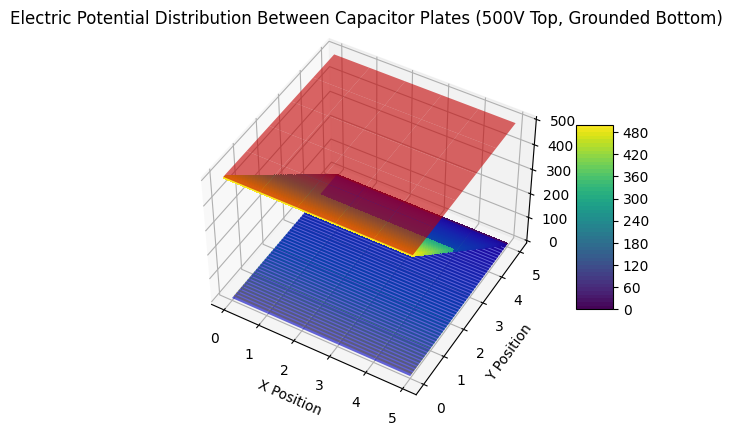

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage, omega=1.5):
    """
    Calculate the voltages at the inner nodes using SOR for faster convergence.

    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
        omega: Relaxation factor (default is 1.5 for over-relaxation).

    Returns:
        voltages: Array of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N - 1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1, N - 1)]
    boundary_right = [top_voltage - i * E for i in range(1, N - 1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration with relaxation (SOR) to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node using the SOR formula
        for i in range(1, N-1):
            for j in range(1, N-1):
                new_value = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])
                voltages[i, j] = (1 - omega) * old_voltages[i, j] + omega * new_value

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations with relaxation factor {omega}.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = int(input("Enter the number of grid points per side, including boundary (e.g., 5): ")) + 1  # Number of grid points
omega = float(input("Enter the relaxation factor (e.g., 1.5): "))  # Relaxation factor

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage, omega)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with Potential Lines in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
ax.contour(X, Y, voltages, 50, cmap='viridis', linestyles="solid", offset=0)  # Electric potential lines

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"Electric Potential Distribution Between Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Adjust the viewing angle to focus on the electric field lines
ax.view_init(elev=45, azim=-60)

# Color bar for the voltage distribution
fig.colorbar(ax.contourf(X, Y, voltages, 50, cmap='viridis'), ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Enter the top boundary voltage (e.g., 500V): 500
Enter the number of grid points per side, including boundary (e.g., 5): 5
Enter the relaxation factor (e.g., 1.5): 1.5
Converged after 31 iterations with relaxation factor 1.5.

Final node voltages:
[[500.         500.         500.         500.         500.
  500.        ]
 [400.         399.99999966 399.9999999  399.99999985 399.99999998
  400.        ]
 [300.         299.99999979 299.99999997 299.99999996 300.00000006
  300.        ]
 [200.         200.00000003 200.00000003 200.         200.00000002
  200.        ]
 [100.          99.99999996 100.00000004 100.         100.00000005
  100.        ]
 [  0.           0.           0.           0.           0.
    0.        ]]


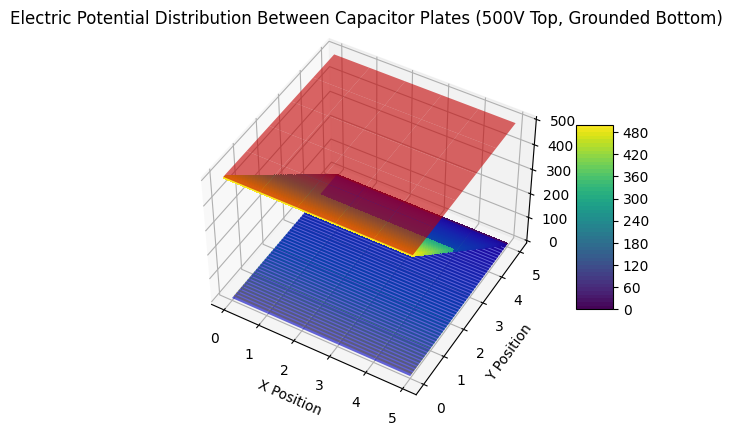

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_inner_node_voltages(N, top_voltage, omega=1.5):
    """
    Calculate the voltages at the inner nodes using SOR for faster convergence.

    Args:
        N: Number of grid points per side, including boundary.
        top_voltage: Voltage at the top boundary.
        omega: Relaxation factor (default is 1.5 for over-relaxation).

    Returns:
        voltages: Array of voltages at the inner nodes.
    """
    # Calculate electric field E
    E = top_voltage / (N - 1)

    # Define the boundary values
    boundary_top = [top_voltage] * N
    boundary_bottom = [0] * N
    boundary_left = [top_voltage - i * E for i in range(1, N - 1)]
    boundary_right = [top_voltage - i * E for i in range(1, N - 1)]

    # Initialize the voltages at all the nodes
    voltages = np.zeros((N, N))

    # Set boundary conditions
    voltages[0, :] = boundary_top
    voltages[-1, :] = boundary_bottom
    voltages[1:-1, 0] = boundary_left
    voltages[1:-1, -1] = boundary_right

    # Gauss-Seidel iteration with relaxation (SOR) to solve for the inner node voltages
    max_iterations = 10000
    tolerance = 1e-6

    for iteration in range(max_iterations):
        old_voltages = np.copy(voltages)

        # Update the voltages for each inner node using the SOR formula
        for i in range(1, N-1):
            for j in range(1, N-1):
                new_value = 0.25 * (voltages[i+1, j] + voltages[i-1, j] + voltages[i, j+1] + voltages[i, j-1])
                voltages[i, j] = (1 - omega) * old_voltages[i, j] + omega * new_value

        # Check for convergence
        diff = np.linalg.norm(voltages - old_voltages)
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations with relaxation factor {omega}.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")

    # Return voltages
    return voltages

# Parameters
top_voltage = float(input("Enter the top boundary voltage (e.g., 500V): "))  # Top boundary voltage
N = int(input("Enter the number of grid points per side, including boundary (e.g., 5): ")) + 1  # Number of grid points
omega = float(input("Enter the relaxation factor (e.g., 1.5): "))  # Relaxation factor

# Calculate inner node voltages
voltages = calculate_inner_node_voltages(N, top_voltage, omega)

# Print the final inner node voltages
print("\nFinal node voltages:")
print(voltages)

# 3D Plot: Showing Two Plates with Potential Lines in Between
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of x, y coordinates
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
X, Y = np.meshgrid(x, y)

# Plot the surface for the voltage distribution
ax.contour(X, Y, voltages, 50, cmap='viridis', linestyles="solid", offset=0)  # Electric potential lines

# Add the capacitor plates
# Top plate at z = top_voltage (high voltage)
ax.plot_surface(X, Y, top_voltage * np.ones_like(voltages), color='red', alpha=0.6, label='Top Plate')

# Bottom plate at z = 0 (grounded)
ax.plot_surface(X, Y, np.zeros_like(voltages), color='blue', alpha=0.6, label='Bottom Plate')

# Labels and title
ax.set_title(f"Electric Potential Distribution Between Capacitor Plates ({int(top_voltage)}V Top, Grounded Bottom)")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Voltage (V)")

# Adjust the viewing angle to focus on the electric field lines
ax.view_init(elev=45, azim=-60)

# Color bar for the voltage distribution
fig.colorbar(ax.contourf(X, Y, voltages, 50, cmap='viridis'), ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()
